In [3]:
import os
user = os.getenv('USER')
import sys
sys.path.insert(0, f'/Home/{user}/py/stereoid')

In [4]:
import glob

import numpy as np
import matplotlib.pyplot as plt
import pyproj


from sklearn.cluster import SpectralClustering
from sklearn.feature_extraction.image import img_to_graph
from sklearn.cluster import AgglomerativeClustering

from harmony23lib import multi_look, label_average

In [5]:
d = np.load('velocities.npz')
ui = d['ui']
vi = d['vi']
ua = d['ua']
va = d['va']


In [6]:
stp = 8
uiz = multi_look(ui, stp)
viz = multi_look(vi, stp)

uz = multi_look(ua, stp)
vz = multi_look(va, stp)

xz, yz = np.meshgrid(np.arange(uz.shape[1]), np.arange(uz.shape[0]))

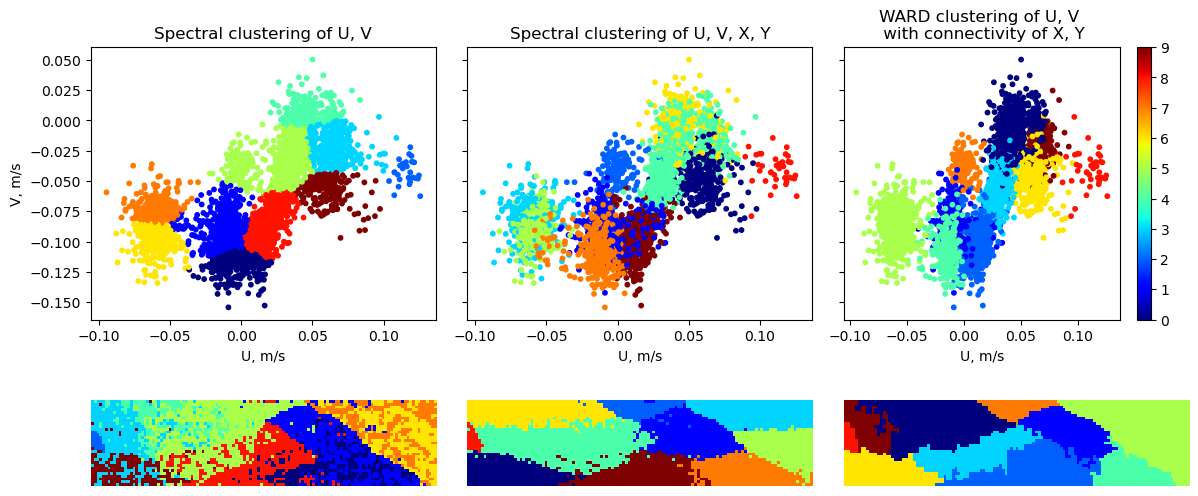

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(12,6), sharey='row')

features = np.vstack([i.flatten() for i in [uz, vz]]).T
f = (features - features.mean(axis=0))/features.std(axis=0)

c = SpectralClustering(n_clusters=10)
labels = c.fit_predict(f)

scat = axs[0, 0].scatter(uz.flatten(), vz.flatten(), 10, labels.flatten(), cmap='jet')
labels.shape = uz.shape
axs[1, 0].imshow(labels.T, cmap='jet', interpolation='nearest')
axs[0, 0].set_title('Spectral clustering of U, V')

features = np.vstack([i.flatten() for i in [uz, vz, xz, yz]]).T
f = (features - features.mean(axis=0))/features.std(axis=0)
c = SpectralClustering(n_clusters=10)
labels = c.fit_predict(f)
labels.shape = uz.shape

scat = axs[0, 1].scatter(uz.flatten(), vz.flatten(), 10, labels.flatten(), cmap='jet')
labels.shape = uz.shape
axs[1, 1].imshow(labels.T, cmap='jet', interpolation='nearest')
axs[0, 1].set_title('Spectral clustering of U, V, X, Y')

features = np.vstack([i.flatten() for i in [uz, vz]]).T
connectivity = img_to_graph(uz)
ward = AgglomerativeClustering(n_clusters=10, linkage="ward", connectivity=connectivity)
ward.fit(features)
labels = ward.labels_.reshape(uz.shape)

scat = axs[0, 2].scatter(uz.flatten(), vz.flatten(), 10, labels.flatten(), cmap='jet')
plt.colorbar(scat, ax = axs[0, 2])
labels.shape = uz.shape
axs[1, 2].imshow(labels.T, cmap='jet', interpolation='nearest')
axs[0, 2].set_title('WARD clustering of U, V \n with connectivity of X, Y')

axs[0,0].set_ylabel('V, m/s')
for ax in axs[0]:
    ax.set_xlabel('U, m/s')

for ax in axs[1]:
    ax.set_axis_off()
plt.tight_layout()
plt.show()

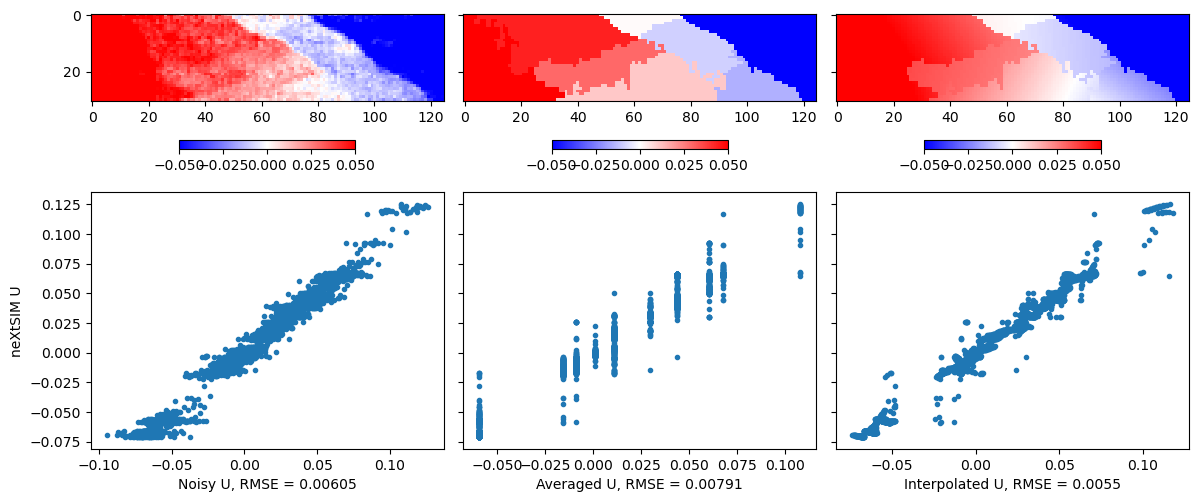

In [20]:
fig, axs = plt.subplots(2,3, figsize=(12,6), sharey='row')

imsh = axs[0, 0].imshow(uz.T, cmap='bwr', clim=[-0.05, 0.05], interpolation='nearest')
plt.colorbar(imsh, ax=axs[0, 0], orientation='horizontal', shrink=0.5)
axs[1, 0].plot(uz.flat, uiz.flat, '.')
axs[1, 0].set_xlabel(f'Noisy U, RMSE = {np.mean((uz.flatten() - uiz.flatten())**2)**0.5:0.3}')

u4, v4 = [label_average(a, labels, xy_interpolation=False) for a in [uz, vz]]
imsh = axs[0, 1].imshow(u4.T, cmap='bwr', clim=[-0.05, 0.05], interpolation='nearest')
plt.colorbar(imsh, ax=axs[0, 1], orientation='horizontal', shrink=0.5)
axs[1, 1].plot(u4.flat, uiz.flat, '.')
axs[1, 1].set_xlabel(f'Averaged U, RMSE = {np.mean((u4.flatten() - uiz.flatten())**2)**0.5:0.3}')

u4, v4 = [label_average(a, labels, xy_interpolation=True) for a in [uz, vz]]
imsh = axs[0, 2].imshow(u4.T, cmap='bwr', clim=[-0.05, 0.05], interpolation='nearest')
plt.colorbar(imsh, ax=axs[0, 2], orientation='horizontal', shrink=0.5)
axs[1, 2].plot(u4.flat, uiz.flat, '.')
axs[1, 2].set_xlabel(f'Interpolated U, RMSE = {np.mean((u4.flatten() - uiz.flatten())**2)**0.5:0.3}')

axs[1, 0].set_ylabel('neXtSIM U')

plt.tight_layout()
plt.show()